In [1]:
import numpy as np
import pandas as pd
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating training and testing datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

np.random.seed(1234)

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is EA1C-322F

 Directory of C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\CDS Assignment\Assignment 3

17-03-2022  09:18    <DIR>          .
12-03-2022  15:43    <DIR>          ..
16-03-2022  17:08    <DIR>          .ipynb_checkpoints
16-03-2022  23:18               140 Index.txt
16-03-2022  23:33               122 Indextxt
16-03-2022  12:29           546,662 Linear regression notes.pdf
17-03-2022  09:18           170,272 linear regression testing.ipynb
16-03-2022  17:16            86,723 Linear_Regression.ipynb
16-03-2022  23:32             8,726 machine.csv
16-03-2022  23:33             2,903 machine.names
16-03-2022  14:01         2,010,493 PRSA_data_2010.1.1-2014.12.31.csv
16-03-2022  23:41            32,717 Real estate valuation data set.xlsx
16-03-2022  23:42             1,076 real state.txt
16-03-2022  14:47    <DIR>          Untitled Folder
16-03-2022  14:48                72 Untitled1.ipynb
              11 File(s)      

In [3]:
# Reading the excel file
data = pd.read_excel('Real estate valuation data set.xlsx')

In [4]:
#Cheaking NA values
data.isna().sum()

# No NA 

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
data['pm2.5'].fillna(value=data['pm2.5'].mean(),inplace = True)

In [133]:
data.isna().sum()

         0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [8]:
usable_columns= ['year','month','day','hour','pm2.5']

In [9]:
df = data[usable_columns]

In [13]:
#df["Date"]=pd.to_datetime(df["year"] + "/" + df["month"] + "/" + df["day"]) ## Not Working here

In [37]:
df['Date'] = pd.to_datetime(df[['day', 'month', 'year']])

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_2540/3837560757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df[['day', 'month', 'year']])


In [51]:
#df['Date']
#df.columns

In [52]:
df_2=df.groupby('Date').mean().reset_index()

usable_columns= ['Date','pm2.5']
#df_2.columns

In [53]:
df2=df_2[['Date','pm2.5']]

In [56]:
y = np.asarray(df2['pm2.5'])
X = df2['Date']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [58]:
X_train.shape

(1278,)

In [59]:
res = sm.OLS(y_train, X_train).fit()#Linear regression didnt work on time series data
print(res.summary())

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

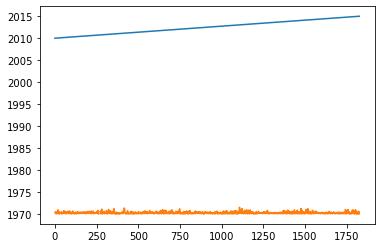

In [60]:
plt.plot(df2)

In [61]:
print("Analytically computing the parameters:")
print(np.linalg.inv(X_train.T@X_train)@X_train.T@y_train)

Analytically computing the parameters:


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [62]:
###############################################################################

In [134]:
df_3=data[25:1025]

In [135]:
usable_columns= ['TEMP','PRES','pm2.5']

In [136]:
df3 = df_3[usable_columns]

In [137]:
df3.shape

(1000, 3)

In [138]:
y = np.asarray(df3[['PRES']])
X = np.array(df3[['TEMP']])


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [140]:
X.shape

(1000, 1)

In [141]:
X

array([[ -4.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -6.],
       [ -6.],
       [ -5.],
       [ -6.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -5.],
       [ -6.],
       [ -6.],
       [ -6.],
       [ -6.],
       [ -7.],
       [ -7.],
       [ -7.],
       [ -8.],
       [ -8.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [ -9.],
       [-10.],
       [ -9.],
       [-11.],
       [-12.],
       [ -9.],
       [-10.],
       [-11.],
       [-11.],
       [-12.],
       [-12.],
       [-13.],
       [-13.],
       [-13.],
       [-12.],
       [-12.],
       [-11.],
       [-10.],
       [-10.],
       [ -9.],
       [ -9.],
       [-11.],
       [-11.],
       [-1

In [142]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

X_train:(700, 1)
y_train:(700, 1)


In [143]:
%matplotlib inline

In [144]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              715.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):                   4.84e-109
Time:                        18:22:53   Log-Likelihood:                         -5601.7
No. Observations:                 700   AIC:                                  1.121e+04
Df Residuals:                     699   BIC:                                  1.121e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [145]:
print("Analytically computing the parameters:")
print(np.linalg.inv(X_train.T@X_train)@X_train.T@y_train)

Analytically computing the parameters:
[[-96.97550621]]


In [146]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("R_squared value: ", res.rsquared)
print("Testing Accuracy:{}".format(r2_score(res.predict(X_test), y_test)))

Parameters:  [-96.97550621]
Standard errors:  [3.62657012]
R_squared value:  0.5056726216230467
Testing Accuracy:-0.8583107993548431


NameError: name 'x' is not defined

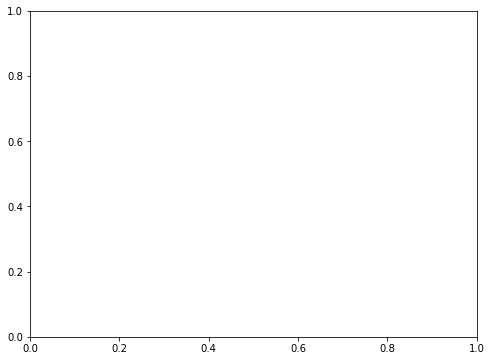

In [82]:
'''
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(X_train[:, 0], res.fittedvalues, "r--.", label="OLS")
ax.plot(X_train[:, 0], iv_u, "r--")
ax.plot(X_train[:, 0], iv_l, "r--")
ax.legend(loc="best")
'''

In [147]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

In [ ]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=False)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

### Sequential Gradient Descent

X_train:(700, 1)
y_train:(700, 1)
Iteration: 0, Cost: 419468.092
Iteration: 1, Cost: 304253.041
Iteration: 2, Cost: 266372.420
Iteration: 3, Cost: 252880.723
Iteration: 4, Cost: 247055.371
Iteration: 5, Cost: 243630.454
Iteration: 6, Cost: 240956.608
Iteration: 7, Cost: 238522.176
Iteration: 8, Cost: 236171.200
Iteration: 9, Cost: 233857.677
Iteration: 10, Cost: 231568.887
Iteration: 11, Cost: 229301.777
Iteration: 12, Cost: 227055.862
Iteration: 13, Cost: 224831.195
Iteration: 14, Cost: 222627.846
Iteration: 15, Cost: 220445.804
Iteration: 16, Cost: 218284.981
Iteration: 17, Cost: 216145.244
Iteration: 18, Cost: 214026.429
Iteration: 19, Cost: 211928.355
Iteration: 20, Cost: 209850.831
Iteration: 21, Cost: 207793.665
Iteration: 22, Cost: 205756.661
Iteration: 23, Cost: 203739.624
Iteration: 24, Cost: 201742.359
Iteration: 25, Cost: 199764.673
Iteration: 26, Cost: 197806.375
Iteration: 27, Cost: 195867.276
Iteration: 28, Cost: 193947.186
Iteration: 29, Cost: 192045.920
Iteration: 30, C

Iteration: 265, Cost: 18787.956
Iteration: 266, Cost: 18603.878
Iteration: 267, Cost: 18421.605
Iteration: 268, Cost: 18241.118
Iteration: 269, Cost: 18062.401
Iteration: 270, Cost: 17885.436
Iteration: 271, Cost: 17710.205
Iteration: 272, Cost: 17536.693
Iteration: 273, Cost: 17364.882
Iteration: 274, Cost: 17194.755
Iteration: 275, Cost: 17026.296
Iteration: 276, Cost: 16859.488
Iteration: 277, Cost: 16694.316
Iteration: 278, Cost: 16530.763
Iteration: 279, Cost: 16368.813
Iteration: 280, Cost: 16208.452
Iteration: 281, Cost: 16049.662
Iteration: 282, Cost: 15892.429
Iteration: 283, Cost: 15736.737
Iteration: 284, Cost: 15582.572
Iteration: 285, Cost: 15429.918
Iteration: 286, Cost: 15278.761
Iteration: 287, Cost: 15129.085
Iteration: 288, Cost: 14980.877
Iteration: 289, Cost: 14834.122
Iteration: 290, Cost: 14688.806
Iteration: 291, Cost: 14544.914
Iteration: 292, Cost: 14402.433
Iteration: 293, Cost: 14261.349
Iteration: 294, Cost: 14121.648
Iteration: 295, Cost: 13983.316
Iteratio

Iteration: 532, Cost: 1364.157
Iteration: 533, Cost: 1350.895
Iteration: 534, Cost: 1337.764
Iteration: 535, Cost: 1324.761
Iteration: 536, Cost: 1311.886
Iteration: 537, Cost: 1299.137
Iteration: 538, Cost: 1286.512
Iteration: 539, Cost: 1274.012
Iteration: 540, Cost: 1261.634
Iteration: 541, Cost: 1249.378
Iteration: 542, Cost: 1237.242
Iteration: 543, Cost: 1225.224
Iteration: 544, Cost: 1213.325
Iteration: 545, Cost: 1201.542
Iteration: 546, Cost: 1189.875
Iteration: 547, Cost: 1178.322
Iteration: 548, Cost: 1166.882
Iteration: 549, Cost: 1155.555
Iteration: 550, Cost: 1144.339
Iteration: 551, Cost: 1133.232
Iteration: 552, Cost: 1122.234
Iteration: 553, Cost: 1111.345
Iteration: 554, Cost: 1100.562
Iteration: 555, Cost: 1089.884
Iteration: 556, Cost: 1079.312
Iteration: 557, Cost: 1068.843
Iteration: 558, Cost: 1058.477
Iteration: 559, Cost: 1048.212
Iteration: 560, Cost: 1038.048
Iteration: 561, Cost: 1027.983
Iteration: 562, Cost: 1018.018
Iteration: 563, Cost: 1008.150
Iteratio

Iteration: 817, Cost: 93.084
Iteration: 818, Cost: 92.284
Iteration: 819, Cost: 91.492
Iteration: 820, Cost: 90.707
Iteration: 821, Cost: 89.930
Iteration: 822, Cost: 89.161
Iteration: 823, Cost: 88.400
Iteration: 824, Cost: 87.645
Iteration: 825, Cost: 86.899
Iteration: 826, Cost: 86.159
Iteration: 827, Cost: 85.427
Iteration: 828, Cost: 84.702
Iteration: 829, Cost: 83.984
Iteration: 830, Cost: 83.273
Iteration: 831, Cost: 82.569
Iteration: 832, Cost: 81.872
Iteration: 833, Cost: 81.182
Iteration: 834, Cost: 80.499
Iteration: 835, Cost: 79.822
Iteration: 836, Cost: 79.152
Iteration: 837, Cost: 78.489
Iteration: 838, Cost: 77.832
Iteration: 839, Cost: 77.181
Iteration: 840, Cost: 76.537
Iteration: 841, Cost: 75.899
Iteration: 842, Cost: 75.268
Iteration: 843, Cost: 74.642
Iteration: 844, Cost: 74.023
Iteration: 845, Cost: 73.410
Iteration: 846, Cost: 72.803
Iteration: 847, Cost: 72.201
Iteration: 848, Cost: 71.606
Iteration: 849, Cost: 71.017
Iteration: 850, Cost: 70.433
Iteration: 851

Iteration: 1097, Cost: 16.654
Iteration: 1098, Cost: 16.604
Iteration: 1099, Cost: 16.553
Iteration: 1100, Cost: 16.504
Iteration: 1101, Cost: 16.454
Iteration: 1102, Cost: 16.406
Iteration: 1103, Cost: 16.357
Iteration: 1104, Cost: 16.310
Iteration: 1105, Cost: 16.262
Iteration: 1106, Cost: 16.216
Iteration: 1107, Cost: 16.169
Iteration: 1108, Cost: 16.123
Iteration: 1109, Cost: 16.078
Iteration: 1110, Cost: 16.033
Iteration: 1111, Cost: 15.988
Iteration: 1112, Cost: 15.944
Iteration: 1113, Cost: 15.900
Iteration: 1114, Cost: 15.857
Iteration: 1115, Cost: 15.814
Iteration: 1116, Cost: 15.772
Iteration: 1117, Cost: 15.730
Iteration: 1118, Cost: 15.688
Iteration: 1119, Cost: 15.647
Iteration: 1120, Cost: 15.606
Iteration: 1121, Cost: 15.566
Iteration: 1122, Cost: 15.526
Iteration: 1123, Cost: 15.486
Iteration: 1124, Cost: 15.447
Iteration: 1125, Cost: 15.408
Iteration: 1126, Cost: 15.369
Iteration: 1127, Cost: 15.331
Iteration: 1128, Cost: 15.294
Iteration: 1129, Cost: 15.256
Iteration:

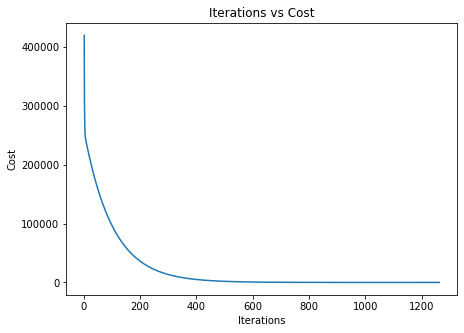

In [149]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=False)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

In [151]:
#Batched
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=False)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

X_train:(700, 1)
y_train:(700, 1)
Iteration: 0, Cost: 377000003.411
Iteration: 1, Cost: 14927099753.412


ValueError: y_true and y_pred have different number of output (700!=1)

NameError: name 'x' is not defined

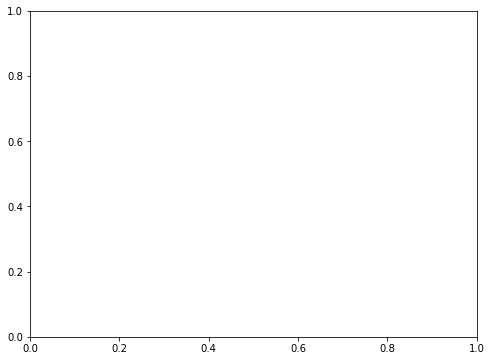

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(X_train[:, 0], seq_regressor.predict(X_train), "r--.", label="OLS")
ax.legend(loc="best")